In [131]:
import string

In [132]:
#Reading text
text=open("read.txt",encoding="utf-8").read()

## TEXT PREPROCESSING

In [133]:
#Lower case text
lower_text=text.lower()
# print(lower_text)

In [134]:
#Remove punctuations
clean_text=text.translate(str.maketrans('', '', string.punctuation))
# print(clean_text)

In [135]:
#Tokenizing word
tokenized_words=clean_text.split()
# print(tokenized_words)

In [136]:
#Removing stopwords
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
final_words=[word for word in tokenized_words if word not in stop_words]
# print(final_words)

## NLP EMOTION

In [137]:
emotion_list={}
with open('emotion.txt','r') as file:
    for line in file:
        clean_line=line.replace("\n","").replace("'","").replace(",","").strip()
        word,emotion=clean_line.split(":")
        
        if word in final_words:
            if emotion not in emotion_list:
                emotion_list[emotion]=1
            else:
                emotion_list[emotion]+=1
print(emotion_list)
total=sum(emotion_list.values())
for key in emotion_list.keys():
    emotion_list[key]=round((emotion_list[key]*100)/total,2)
print(emotion_list)

{' attached': 1, ' hated': 3, ' sad': 3, ' happy': 5, ' free': 1, ' alone': 3, ' attracted': 1, ' anxious': 1, ' fearful': 1, ' focused': 1, ' adequate': 1}
{' attached': 4.76, ' hated': 14.29, ' sad': 14.29, ' happy': 23.81, ' free': 4.76, ' alone': 14.29, ' attracted': 4.76, ' anxious': 4.76, ' fearful': 4.76, ' focused': 4.76, ' adequate': 4.76}


## VISUALIZATION

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

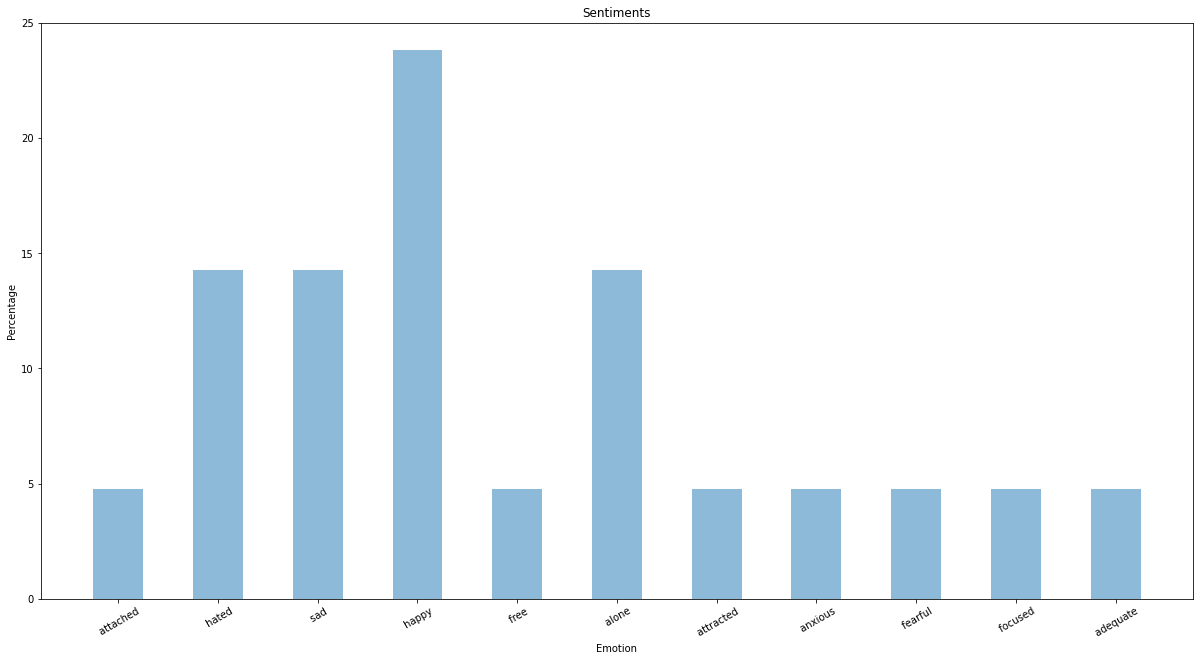

In [139]:
fig=plt.figure(figsize=(16,8))
axes=fig.add_axes([0,0,1,1])
axes.bar(emotion_list.keys(),emotion_list.values(),align='center',width=0.5,alpha=0.5)
axes.set_title('Sentiments')
axes.set_xlabel('Emotion')
axes.set_ylabel('Percentage')
plt.xticks(rotation=30)
plt.show()

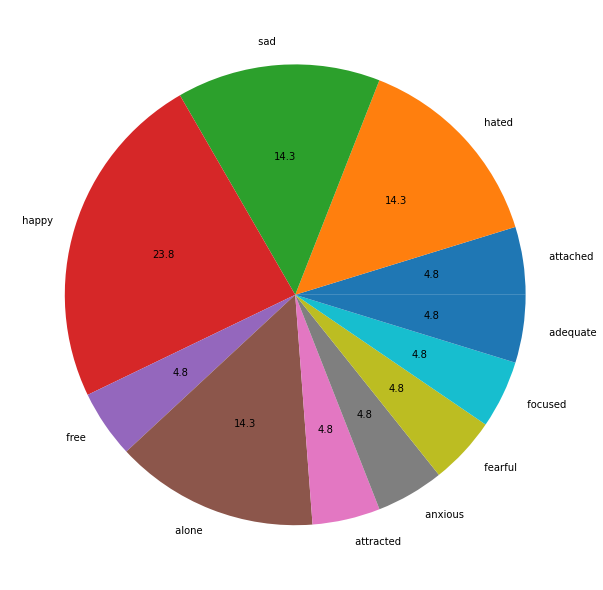

In [140]:
fig=plt.figure(figsize=(16,8))
axes=fig.add_axes([0,0,1,1])
axes.pie(emotion_list.values(),labels=emotion_list.keys(),autopct='%.1f')
plt.show()